# Curve di possibilità pluviometrica

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np


In [2]:
os.getcwd()
os.chdir('C:/Users/Luca/Desktop/idrologia/LAVORO GRUPPO/Dati')

In [3]:
data=pd.read_csv('DatiFedaia.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

In [5]:
data

,1h,3h,6h,12h,24h
Anno,,,,,
1919,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2006,NaN,NaN,NaN,NaN,NaN
2007,12.6,32.2,43.8,48.6,57.0
2008,40.0,50.8,61.2,83.4,91.8


In [6]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [7]:
best=pd.read_pickle("best_param")
best

,1h,3h,6h,12h,24h
a,12.601354,22.712616,31.960715,48.746973,66.168039
b,3.002031,5.155363,9.341875,13.646262,24.067697


In [8]:
'''
q10=1-1/10 #prob di non superamento
q20=1-1/20
q100=1-1/100
q200=1-1/200
'''

def qn(n): #n tempo di ritorno
    return 1-1/n #probabilità di non superamento

def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

h=data.columns

q=[10,20,100]

ind=[1,3,6,12,24]

pts1=[]
pts0=[]
for i in h:
    for j in q:    
        pts0.append(qtls(best[i],qn(j)))
    pts1.append(pts0)
    pts0=[]

pts1
pts= DataFrame(pts1,index=ind, columns=q)
pts

,10,20,100
1,19.357026,21.517972,26.411144
3,34.314076,38.025050,46.428054
6,52.983364,59.707907,74.934732
12,79.456076,89.279036,111.521815
24,120.329198,137.653798,176.883037


In [9]:
SMALL_SIZE=15
MEDIUM_SIZE=20
BIGGER_SIZE=30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
import random
colors={}
for i in q:
    colore=(random.random(), random.random(), random.random())
    colors.update({i:colore})
colors

{10: (0.9947186360257029, 0.5964078634263436, 0.3670699781225659),
 20: (0.2601880438520977, 0.4145936837247949, 0.8211931247073736),
 100: (0.10936970632892873, 0.6711045266258947, 0.055491067270757366)}

(0.0, 200.0)

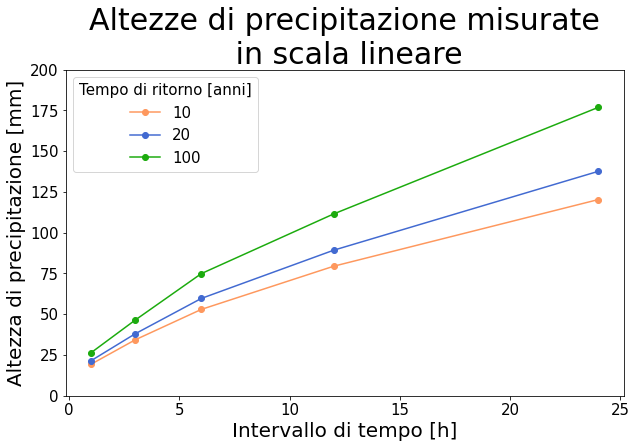

In [11]:
ag=pts.plot(style="-o",figsize=(10,6),color=[colors[q[0]],colors[q[1]],colors[q[2]]])
ag.set_title('Altezze di precipitazione misurate\n in scala lineare')
ag.set_ylabel('Altezza di precipitazione [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
legend = plt.legend (title= "Tempo di ritorno [anni]")
plt.ylim([0,200])

ag=pts.plot(style="-o",figsize=(10,6))
#plt.xlim([0,30])
plt.ylim([0,200])

C:\Users\Luca\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(17.329907953981284, 200)

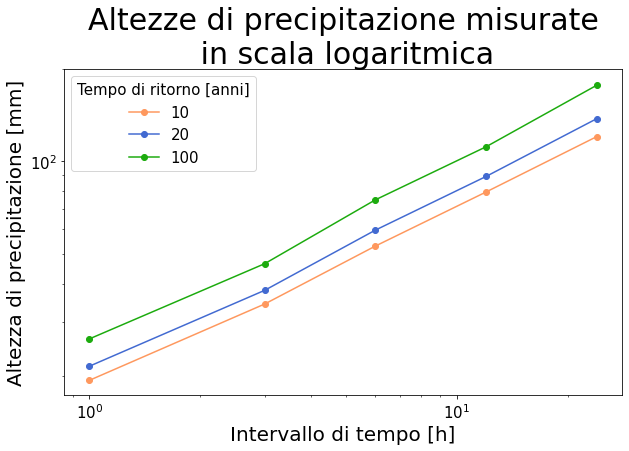

In [12]:
ag=pts.plot(style="-o",figsize=(10,6),color=[colors[q[0]],colors[q[1]],colors[q[2]]])
ag.set_yscale('log')
ag.set_xscale('log')
ag.set_title('Altezze di precipitazione misurate\n in scala logaritmica')
ag.set_ylabel('Altezza di precipitazione [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
legend = plt.legend (title= "Tempo di ritorno [anni]")
plt.ylim([0,200])

In [13]:
In=[]
a=0
for j in q:
    In.append(np.polyfit(np.log(ind),np.log(pts[j]),1)) 
    In[a][1]=np.exp(In[a][1])
    a+=1

In [14]:
fnl=DataFrame(In,index=q,columns=['n','a']) 
fnl

,n,a
10,0.578487,18.863078
20,0.587302,20.862302
100,0.601473,25.398322


In [15]:
tp=np.linspace(0.7,30,100) 

In [16]:
def h(tp,a,n): 
    return a*tp**n

In [17]:
hh=[]
for i in q:
    hh.append(h(tp,fnl['a'][i],fnl['n'][i]))

inh=DataFrame(hh,index=["Tr=10","Tr=20","Tr=100"], columns=tp).T

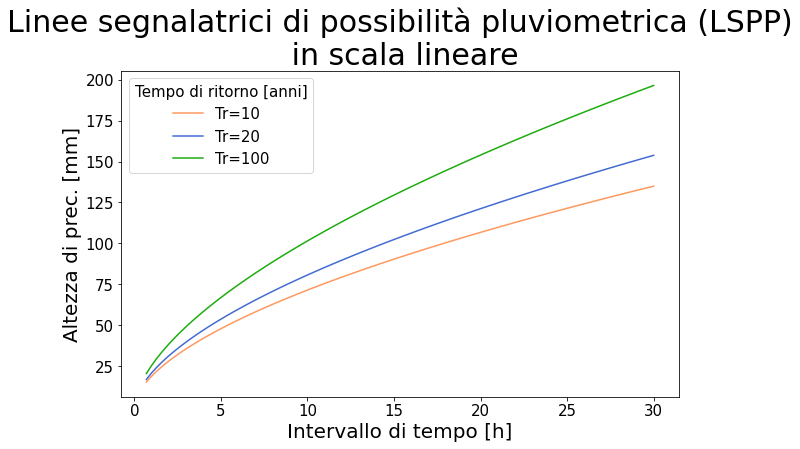

In [18]:
ag=inh.plot(color=[colors[q[0]],colors[q[1]],colors[q[2]]],figsize=(10,6))    
ag.set_title('Linee segnalatrici di possibilità pluviometrica (LSPP)\n in scala lineare')
ag.set_ylabel('Altezza di prec. [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
legend = plt.legend (title= "Tempo di ritorno [anni]")

(0.0, 200.0)

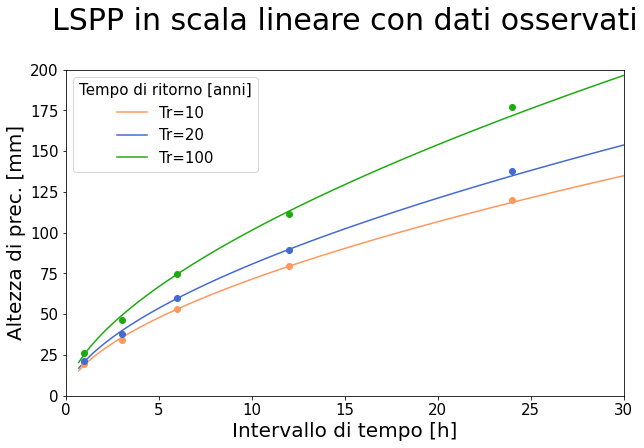

In [22]:
ag=inh.plot(color=[colors[q[0]],colors[q[1]],colors[q[2]]],figsize=(10,6)) 
ag.set_title('LSPP in scala lineare con dati osservati\n')
ag.set_ylabel('Altezza di prec. [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
legend = plt.legend (title= "Tempo di ritorno [anni]")

for i in q:
    ag=plot(pts[i],"o",color=colors[i])

plt.xlim([0,30])
plt.ylim([0,200])

C:\Users\Luca\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':
C:\Users\Luca\anaconda3\envs\geoframe_verona\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


(13.509561877661195, 200)

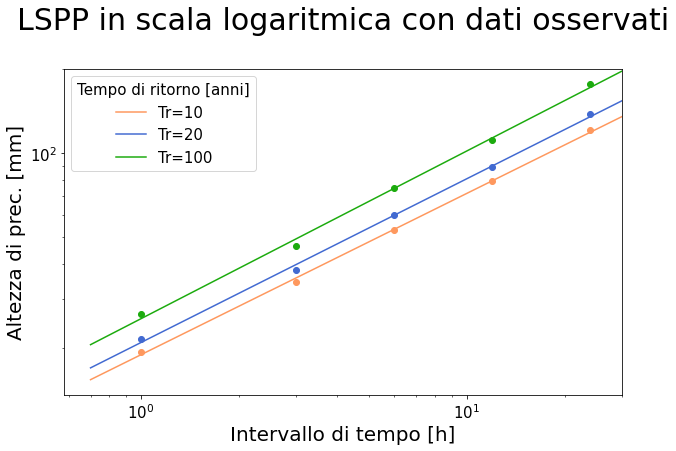

In [23]:
ag=inh.plot(color=[colors[q[0]],colors[q[1]],colors[q[2]]],figsize=(10,6))  
ag.set_yscale('log')                                               
ag.set_xscale('log')
ag.set_title('LSPP in scala logaritmica con dati osservati\n')
ag.set_ylabel('Altezza di prec. [mm]')
ag.set_xlabel('Intervallo di tempo [h]')
legend = plt.legend (title= "Tempo di ritorno [anni]")

for i in q:
    ag=plot(pts[i],"o",color=colors[i])

plt.xlim([0,30])
plt.ylim([0,200])